# 2209261 Basic Programming NLP
# Lab 10 : Pandas Visualization 
## Done by : 6730084521 Chatrphol Ovanonchai

# PART 2. Pandas operations and grouping.

## Instructions
1. Read csv file StudentsPerformance.csv
2. Perform the operations on the StudentsPerformance dataframe as instructed below.
   
*   a) Create a new column, **"average score"**, where the values are weighted in this criteria. (Math ~ 50%, reading ~25% and writing ~25%)  
*   b) Assign a letter grade to each student where
A >= 80, 80> B >=70, 70> C >=60, 60> D >=50 and F < 50 on **the average score**.

3. Answer the questions below.


* a)**[Previous week]** How many students in this class get A? what is the percentage of A students? [19.6]
* b) **[Previous week]** If we observe only **"male"** students, What is the percentage among **"male"** students in this class get an A? [18.05]

* c) **[Previous week]** \[True/False\] We see more students who receive "**A**" on a parent with at least an "associate's degree" than a parent with a "high school" degree. [True]
* d) How many students receive grade **A** on each "parental level of education" group?  

* e) What is the average math score on each "parental level of education" group?
* f) For each lunch category (free/reduced vs. standard), calculate the proportion of students who both: 
  * a) Achieved a grade A (based on the weighted average score).
  * b) Completed the test preparation course.
[free/reduced    0.061972
standard        0.122481]

"parental level of education" ~ [master's degree","bachelor's degree","some college","associate's degree",'high school','some high school'] sorted by degree order.

*You might want to use **.isin** to check if a value is in some list. ([ReadMe](https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe))*




In [79]:
import pandas as pd
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [80]:
df_exams = pd.read_csv('StudentsPerformance.csv')
print(df_exams)

     gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0    female        group B           bachelor's degree      standard                    none          72             72             74
1    female        group C                some college      standard               completed          69             90             88
2    female        group B             master's degree      standard                    none          90             95             93
3      male        group A          associate's degree  free/reduced                    none          47             57             44
4      male        group C                some college      standard                    none          76             78             75
..      ...            ...                         ...           ...                     ...         ...            ...            ...
995  female        group E             master's degree 

In [81]:
df_exams["avg"] = df_exams['math score']*0.5 + df_exams['reading score']*0.25 + df_exams['writing score']*.25
print(df_exams)

     gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score    avg
0    female        group B           bachelor's degree      standard                    none          72             72             74  72.50
1    female        group C                some college      standard               completed          69             90             88  79.00
2    female        group B             master's degree      standard                    none          90             95             93  92.00
3      male        group A          associate's degree  free/reduced                    none          47             57             44  48.75
4      male        group C                some college      standard                    none          76             78             75  76.25
..      ...            ...                         ...           ...                     ...         ...            ...            ...    ...
995  f

### 2B , 3A , 3B , 3C Code from Lab 9  

In [82]:
# 2b) assign grade letter 
def grading_student(score) : 
    if score >= 80 : 
        return 'A'
    elif 70 <= score < 80 : 
        return 'B'
    elif 60 <= score < 70 : 
        return 'C'
    elif 50 <= score < 60 : 
        return 'D'
    else : 
        return 'F'
    
# apply function to column
df_exams['grade letter'] = df_exams.apply(lambda df_exams : grading_student( df_exams['avg'] ) , axis = 1)
df_exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg,grade letter
0,female,group B,bachelor's degree,standard,none,72,72,74,72.50,B
1,female,group C,some college,standard,completed,69,90,88,79.00,B
2,female,group B,master's degree,standard,none,90,95,93,92.00,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,48.75,F
4,male,group C,some college,standard,none,76,78,75,76.25,B
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,92.50,A
996,male,group C,high school,free/reduced,none,62,55,55,58.50,D
997,female,group C,high school,free/reduced,completed,59,71,65,63.50,C
998,female,group D,some college,standard,completed,68,78,77,72.75,B


In [83]:
# 3a) count student who got A and percentage of grade A in class
grade_A = df_exams['grade letter'] == 'A'
grade_A_students = sum(grade_A)

# calculate to percentage
print("Students who got grade letter A : " , grade_A_students)
print("Percentage of A students to all students : " , grade_A_students / df_exams.shape[0] * 100 )

Students who got grade letter A :  196
Percentage of A students to all students :  19.6


In [84]:
# 3b) count only male students from 3a)
male_students = sum(df_exams['gender'] == 'male')
grade_A_male = (df_exams['grade letter'] == 'A') & (df_exams['gender'] == 'male')
grade_A_male_students = sum(grade_A_male)

# calculate to percentage
# print("Male Students who got grade letter A : " , grade_A_male_students)
print("Percentage of A and Male students to all Male students : " , round(grade_A_male_students / male_students * 100 , 2) )

Percentage of A and Male students to all Male students :  18.05


In [85]:
# 3c) check if A students' parents is from associate degree more than high school

# cut dataframe for only students who got grade letter A 
grade_A_students_df = df_exams[ df_exams['grade letter'] == 'A' ]
grade_A_students_df

# create order of education
education_degree = ["master's degree","bachelor's degree","some college","associate's degree",'high school','some high school']

# use pd.Categorical to sort by order
grade_A_students_df["parental level of education"] = pd.Categorical(grade_A_students_df["parental level of education"], categories=education_degree, ordered=True)
grade_A_students_df = grade_A_students_df.sort_values(by = "parental level of education")

## count value in "parental level of education" column
grade_A_students_df['parental level of education'].value_counts()

## So , Parent with associate degree (53) is more than high school (27+19 = 46) == True

/var/folders/t7/hn7xqdgs28vbkzlq0tg_5m480000gn/T/ipykernel_69579/2680788870.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_A_students_df["parental level of education"] = pd.Categorical(grade_A_students_df["parental level of education"], categories=education_degree, ordered=True)


parental level of education
associate's degree    53
some college          45
bachelor's degree     31
some high school      27
master's degree       21
high school           19
Name: count, dtype: int64

## 3D , 3E , 3F from Lab 10

In [86]:
# 3d) find grade A students from each parental level of education 
grade_A_students_df['parental level of education'].value_counts()

parental level of education
associate's degree    53
some college          45
bachelor's degree     31
some high school      27
master's degree       21
high school           19
Name: count, dtype: int64

In [87]:
# 3e) average math score for each parental level of education (for all students)
df_exams.groupby('parental level of education')['math score'].mean() # group by `parental` with `math score` column then get mean score

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

In [88]:
# 3f) 
"""
For each lunch category (free/reduced vs. standard), calculate the proportion of students who both: 
  * a) Achieved a grade A (based on the weighted average score).
  * b) Completed the test preparation course.
"""
df_exams[ (df_exams['grade letter'] == 'A') & (df_exams['test preparation course'] == 'completed') ]['lunch'].value_counts(normalize=True) # normalize for proportion

lunch
standard        0.782178
free/reduced    0.217822
Name: proportion, dtype: float64

# PART 3. Visualization

* g) Create a bar plot that shows the number of students in each letter grade (A–F), separated by gender.
* h) Show the distribution of math, reading, and writing scores for each gender.
* i) Display the proportion of grades by gender, showing both the total counts and the percentages.
* j) Visualize the trend of math and reading scores for both genders.

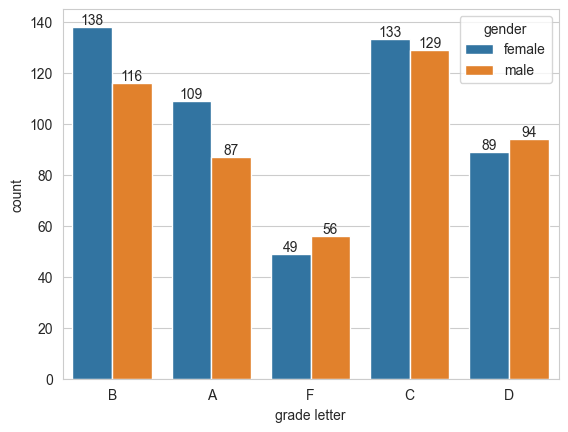

In [89]:
# 3g) Create a bar plot that shows the number of students in each letter grade (A–F), separated by gender.
import matplotlib.pyplot as plt 
import seaborn as sns 

ax = sns.countplot(data = df_exams , x = 'grade letter' , hue = "gender") # 'hue' similar to groupby

# add frequency on each bar 
for container in ax.containers:
    ax.bar_label(container)
plt.show()

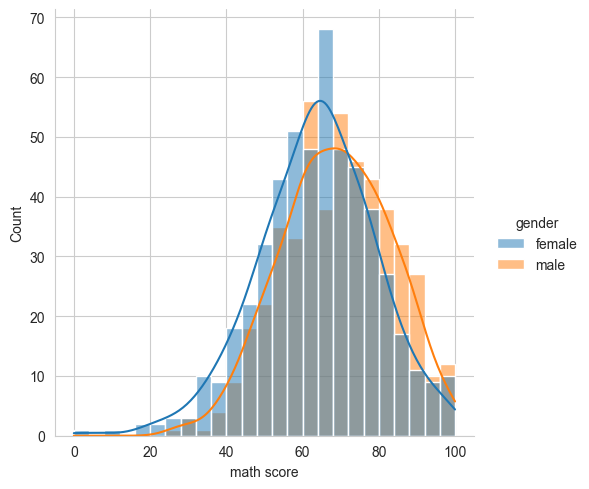

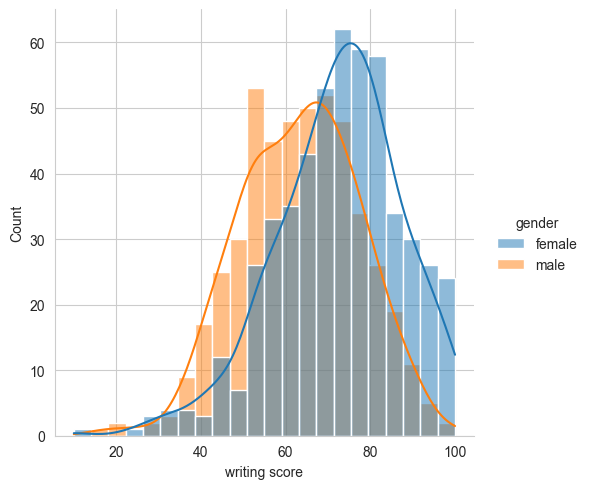

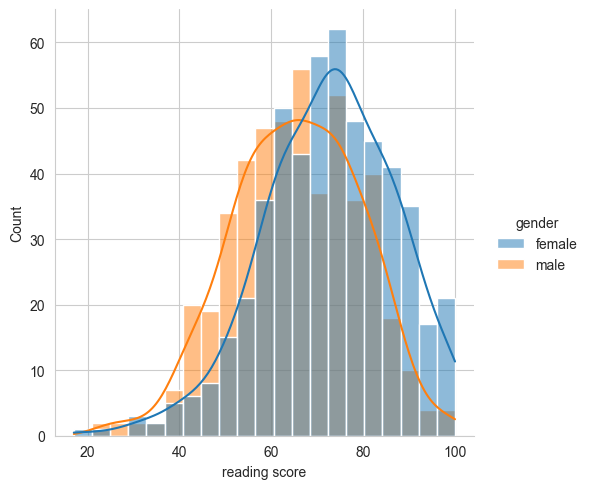

In [90]:
# 3h) Show the distribution of math, reading, and writing scores for each gender. 
sns.displot(data = df_exams , x = "math score" , hue = "gender" , kde = True) # histogram plot but add kde curve line (not a [kde only] type)
sns.displot(data = df_exams , x = "writing score" , hue = "gender" , kde = True) # histogram plot but add kde curve line (not a [kde only] type)
sns.displot(data = df_exams , x = "reading score" , hue = "gender", kde = True) # histogram plot but add kde curve line (not a [kde only] type)

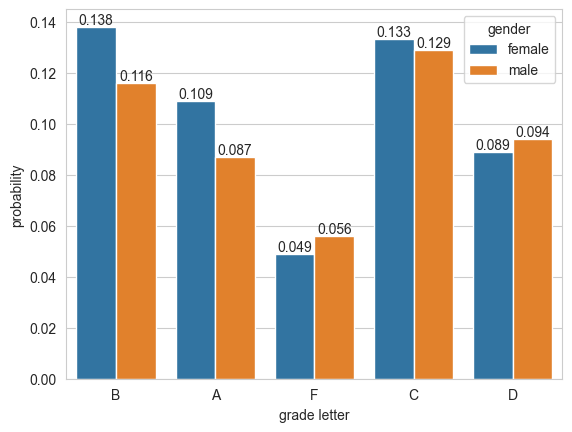

In [91]:
# 3i) Display the proportion of grades by gender, showing both the total counts and the percentages.
ax = sns.countplot(data = df_exams , x = 'grade letter' , stat="probability" , hue = "gender") # show proportion
for container in ax.containers:
    ax.bar_label(container)
plt.show()

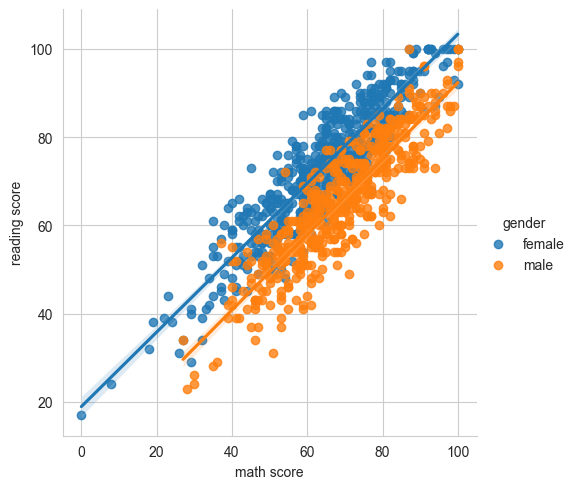

In [92]:
# 3j) Visualize the trend of math and reading scores for both genders.
sns.lmplot(data=df_exams, x='math score', y='reading score' , hue = "gender")